In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
td = pd.read_csv('churn_modeling.csv')

In [3]:
td.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
td.shape

(10000, 14)

## Cleaning Data

In [5]:
td.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [6]:
td.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
td.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

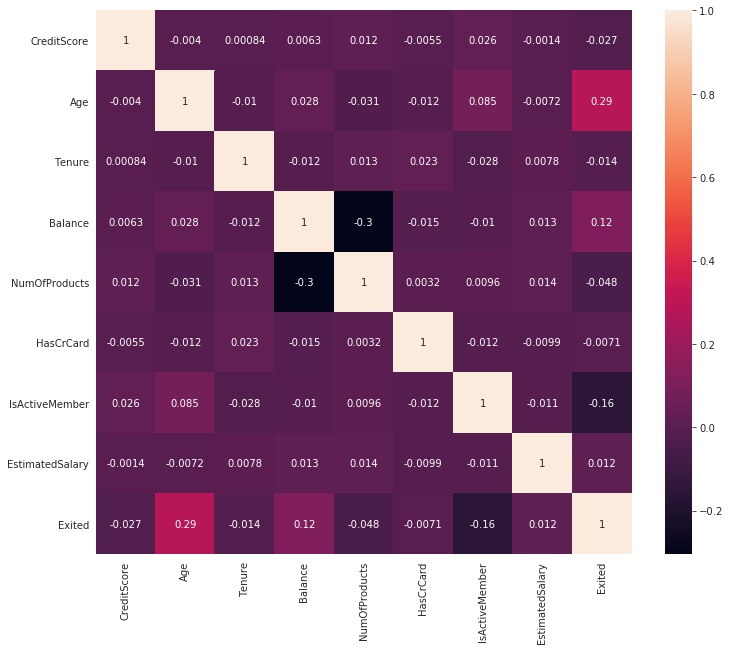

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(td.corr(),annot = True)

## Encoding Dataset

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
le = LabelEncoder()
td['Gender'] = le.fit_transform(td['Gender'])
td = pd.concat((pd.DataFrame(OneHotEncoder(sparse = False).fit_transform(pd.DataFrame(td.Geography)),columns = ["FromFrance","FromSpain","FromGermany"]),td),axis = 1) #Geography onehotencoding
td.drop(columns= ["Geography"],inplace = True)

In [11]:
td.head()

,FromFrance,FromSpain,FromGermany,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0


## Normalization

In [12]:
mx = MinMaxScaler()
td[['Balance', 'Age', 'CreditScore', 'EstimatedSalary']] = mx.fit_transform(td[['Balance', 'Age', 'CreditScore', 'EstimatedSalary']])

In [13]:
td.head()

,FromFrance,FromSpain,FromGermany,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.0,0.0,1.0,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,1.0,0.0,0.0,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,1.0,0.0,0.0,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,0.0,0.0,1.0,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0


In [14]:
X = td.drop('Exited', axis = 1)
y = td['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)
print(X_train.shape, X_test.shape)

(7500, 12) (2500, 12)


##  CREATING MODEL

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 74,721
Trainable params: 74,721
Non-trainable params: 0
____________________________________________________

In [18]:
model.fit(X_train, y_train, epochs =100)

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4767 - accuracy: 0.7963
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4592 - accuracy: 0.7993
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8091
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8245
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3739 - accuracy: 0.8372
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8399
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8464
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8492
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8521
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3509 - accura

235/235 [==============================] - 1s 4ms/step - loss: 0.1529 - accuracy: 0.9345
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1523 - accuracy: 0.9333
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9284
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1542 - accuracy: 0.9360
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1408 - accuracy: 0.9407
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1394 - accuracy: 0.9401
Epoch 87/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1439 - accuracy: 0.9408
Epoch 88/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1434 - accuracy: 0.9396
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9425
Epoch 90/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1342 - accuracy: 

In [19]:
loss, acc = model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 1.3665 - accuracy: 0.8100


In [20]:
print('Loss of our model : ' + str(loss * 10) + "% \n" + 'Accuracy of our model : ' + str(acc * 100) + "%")

Loss of our model : 13.6646568775177% 
Accuracy of our model : 81.00000023841858%


In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.round_(y_pred)
confusion_matrix(y_test,y_pred)

array([[1755,  231],
       [ 244,  270]])

In [22]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.88      0.88      1986\n           1       0.54      0.53      0.53       514\n\n    accuracy                           0.81      2500\n   macro avg       0.71      0.70      0.71      2500\nweighted avg       0.81      0.81      0.81      2500\n'

In [23]:
print("ACCURACY OF OUR MODEL IS : " + str(accuracy_score(y_test, y_pred)* 100) + "%")

ACCURACY OF OUR MODEL IS : 81.0%
